In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading the cleaned dataset into a dataframe

In [2]:
df = pd.read_csv('../data/processed/cleaned_household_energy.csv')
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


#### Doing a simple EDA on the cleaned data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573291 entries, 0 to 1573290
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Global_active_power    1573291 non-null  float64
 1   Global_reactive_power  1573291 non-null  float64
 2   Voltage                1573291 non-null  float64
 3   Global_intensity       1573291 non-null  float64
 4   Sub_metering_1         1573291 non-null  float64
 5   Sub_metering_2         1573291 non-null  float64
 6   Sub_metering_3         1573291 non-null  float64
 7   Datetime               1573291 non-null  object 
dtypes: float64(7), object(1)
memory usage: 96.0+ MB


In [4]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1.573291e+06,1.573291e+06,1.573291e+06,1.573291e+06,1.573291e+06,1.573291e+06,1.573291e+06
mean,1.096389e+00,1.220203e-01,2.406027e+02,4.655459e+00,1.155497e+00,1.355069e+00,6.195219e+00
std,1.088634e+00,1.119025e-01,3.291816e+00,4.578839e+00,6.273919e+00,6.011391e+00,8.329056e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e-01,4.600000e-02,2.387000e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.700000e-01,1.000000e-01,2.408100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.532000e+00,1.920000e-01,2.427300e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.539400e+02,4.840000e+01,8.200000e+01,7.800000e+01,3.100000e+01


<Axes: xlabel='Global_active_power', ylabel='Count'>

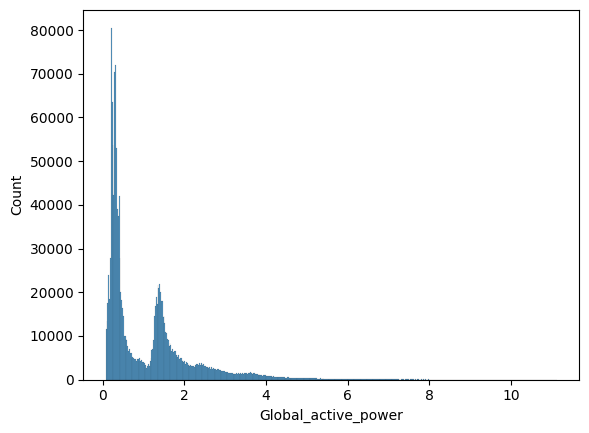

In [5]:
#visualizing target distribution
sns.histplot(df['Global_active_power'])

Insight:

The target variable Global_active_power shows a right-skewed distribution, with most readings concentrated below 2 kW and occasional high-usage peaks up to around 10 kW. This pattern is typical of household energy consumption

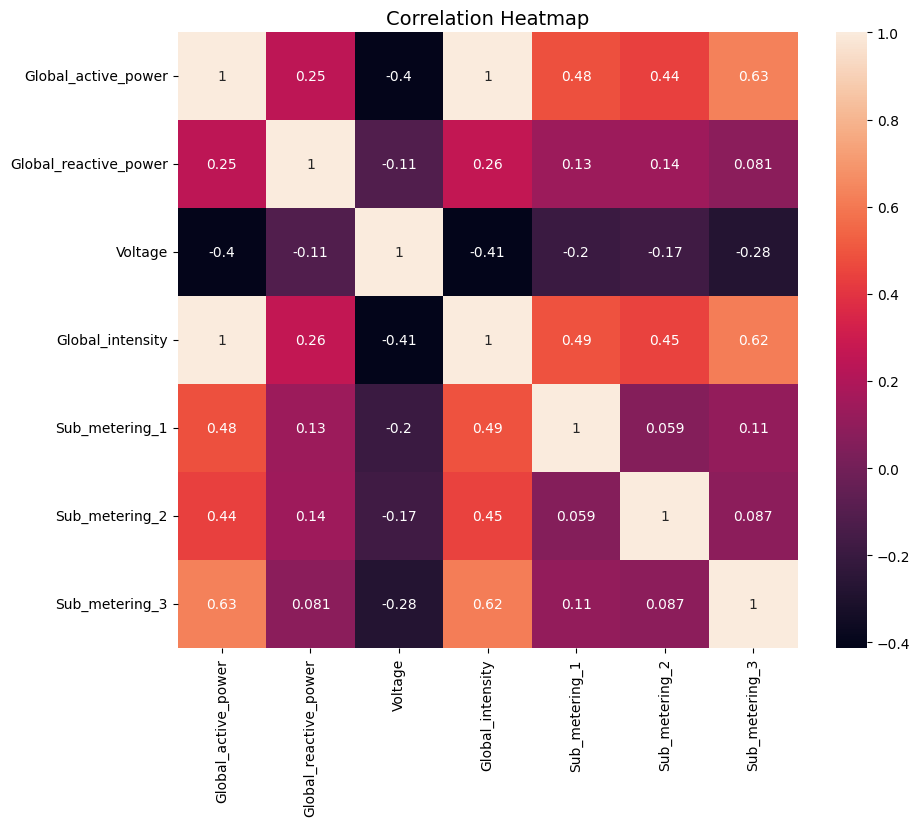

In [6]:
#Checking correlation using heatmap

corr = df.corr(numeric_only = True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot = True)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

- Global_active_power has strong positive correlation with

- Global_intensity (1.0 — perfect correlation, possibly redundant)

- Sub_metering_3 (0.63)

- Sub_metering_1 (0.48)

- Sub_metering_2 (0.44)

- Voltage shows weak or negative correlation with most features.
→ It might not be a strong predictor but could still capture variation.

- Global_reactive_power shows low to moderate correlation with others, so it may add unique information.

### Creating useful features that can improve the model’s learning power

In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
df['Datetime'].isnull().sum()


np.int64(0)

In [12]:
#creating time based features

df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek
df['Is_Weekend'] = df['DayOfWeek'].isin([5,6]).astype(int)


In [13]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Year,Month,Day,Hour,DayOfWeek,Is_Weekend
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,17,5,1
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,17,5,1
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16,17,5,1
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,16,17,5,1
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,16,17,5,1


In [14]:
df['Rolling_mean_1h'] = df['Global_active_power'].rolling(window=60, min_periods=1).mean()
df['Rolling_std_1h']  = df['Global_active_power'].rolling(window=60, min_periods=1).std()


In [16]:
df['Total_sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df['Unmetered_power'] = (df['Global_active_power']*1000/60) - df['Total_sub_metering']


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573291 entries, 0 to 1573290
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Global_active_power    1573291 non-null  float64       
 1   Global_reactive_power  1573291 non-null  float64       
 2   Voltage                1573291 non-null  float64       
 3   Global_intensity       1573291 non-null  float64       
 4   Sub_metering_1         1573291 non-null  float64       
 5   Sub_metering_2         1573291 non-null  float64       
 6   Sub_metering_3         1573291 non-null  float64       
 7   Datetime               1573291 non-null  datetime64[ns]
 8   Year                   1573291 non-null  int32         
 9   Month                  1573291 non-null  int32         
 10  Day                    1573291 non-null  int32         
 11  Hour                   1573291 non-null  int32         
 12  DayOfWeek              15732

In [18]:
df.drop(columns=['Datetime'], inplace=True)
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek',
       'Is_Weekend', 'Rolling_mean_1h', 'Rolling_std_1h', 'Total_sub_metering',
       'Unmetered_power'],
      dtype='object')

In [ ]:
df.corr()['Global_active_power']

Global_active_power      1.000000
Global_reactive_power    0.246381
Voltage                 -0.403054
Global_intensity         0.998953
Sub_metering_1           0.483810
Sub_metering_2           0.441704
Sub_metering_3           0.628428
Year                    -0.042972
Month                   -0.022356
Day                     -0.003501
Hour                     0.283642
DayOfWeek                0.077003
Is_Weekend               0.097330
Rolling_mean_1h          0.777058
Rolling_std_1h           0.597046
Total_sub_metering       0.839657
Unmetered_power          0.714615
Name: Global_active_power, dtype: float64

<Axes: >

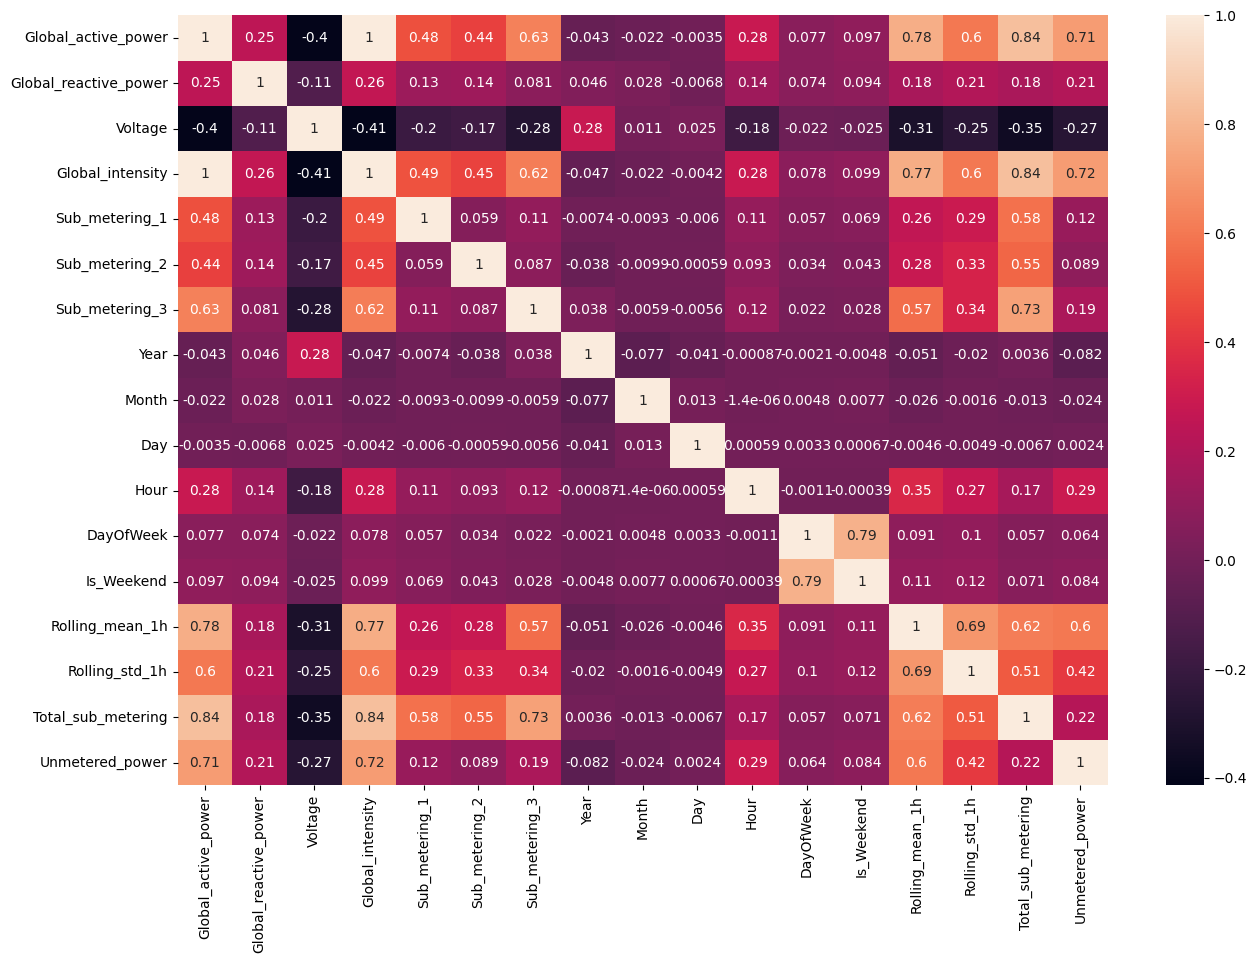

In [22]:
plt.figure(figsize=(15, 10))
correlation = df.corr()

sns.heatmap(correlation, annot = True)

After performing feature engineering, the variables most strongly correlated with Global_active_power are Global_intensity, Total_sub_metering, Rolling_mean_1h, and Unmetered_power.
However, since Global_intensity is almost perfectly correlated with the target variable (r ≈ 0.999), it was removed to prevent multicollinearity and redundancy.

The engineered temporal features — Rolling_mean_1h, Rolling_std_1h, and Hour — show meaningful relationships with power consumption, effectively capturing short-term trends and time-dependent behavior in household energy usage.

### Feature Extraction

In [23]:
# dropping Global_intensity to avoid multicollinearity
df.drop(['Global_intensity'], axis=1, inplace=True)


In [24]:
#dropping Year, Month, Day columns since they have least correlation and adds no value for model building as they are meaningless
cols_to_drop = ['Year', 'Month', 'Day']
df.drop(cols_to_drop, axis = 1, inplace = True, errors = 'ignore')

In [25]:
df.columns.tolist()

['Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3',
 'Hour',
 'DayOfWeek',
 'Is_Weekend',
 'Rolling_mean_1h',
 'Rolling_std_1h',
 'Total_sub_metering',
 'Unmetered_power']

### saving the feature engineered dataset to csv

In [26]:
df.to_csv("../data/processed/feature_engineered_data.csv", index = False)


In [27]:
#checking 
df1 = pd.read_csv('../data/processed/feature_engineered_data.csv')
df1.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,DayOfWeek,Is_Weekend,Rolling_mean_1h,Rolling_std_1h,Total_sub_metering,Unmetered_power
0,4.216,0.418,234.84,0.0,1.0,17.0,17,5,1,4.216000,NaN,18.0,52.266667
1,5.360,0.436,233.63,0.0,1.0,16.0,17,5,1,4.788000,0.808930,17.0,72.333333
2,5.374,0.498,233.29,0.0,2.0,17.0,17,5,1,4.983333,0.664567,19.0,70.566667
3,5.388,0.502,233.74,0.0,1.0,17.0,17,5,1,5.084500,0.579113,18.0,71.800000
4,3.666,0.528,235.68,0.0,1.0,17.0,17,5,1,4.800800,0.808676,18.0,43.100000


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573291 entries, 0 to 1573290
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Global_active_power    1573291 non-null  float64
 1   Global_reactive_power  1573291 non-null  float64
 2   Voltage                1573291 non-null  float64
 3   Sub_metering_1         1573291 non-null  float64
 4   Sub_metering_2         1573291 non-null  float64
 5   Sub_metering_3         1573291 non-null  float64
 6   Hour                   1573291 non-null  int64  
 7   DayOfWeek              1573291 non-null  int64  
 8   Is_Weekend             1573291 non-null  int64  
 9   Rolling_mean_1h        1573291 non-null  float64
 10  Rolling_std_1h         1573290 non-null  float64
 11  Total_sub_metering     1573291 non-null  float64
 12  Unmetered_power        1573291 non-null  float64
dtypes: float64(10), int64(3)
memory usage: 156.0 MB


In [31]:
df1.dropna(subset=['Rolling_std_1h'], inplace=True)  #cause it has a nan value can drop off

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1573290 entries, 1 to 1573290
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Global_active_power    1573290 non-null  float64
 1   Global_reactive_power  1573290 non-null  float64
 2   Voltage                1573290 non-null  float64
 3   Sub_metering_1         1573290 non-null  float64
 4   Sub_metering_2         1573290 non-null  float64
 5   Sub_metering_3         1573290 non-null  float64
 6   Hour                   1573290 non-null  int64  
 7   DayOfWeek              1573290 non-null  int64  
 8   Is_Weekend             1573290 non-null  int64  
 9   Rolling_mean_1h        1573290 non-null  float64
 10  Rolling_std_1h         1573290 non-null  float64
 11  Total_sub_metering     1573290 non-null  float64
 12  Unmetered_power        1573290 non-null  float64
dtypes: float64(10), int64(3)
memory usage: 168.0 MB
